In [73]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras.optimizers import RMSprop, Adam
from os.path import isfile, join 
from os import listdir 
import cv2
import numpy as np
from PIL import Image   #匯入Image模組
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#切training and validation data
#training image大小不一怎麼辦

In [86]:
flower_mapping = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}

batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 5 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量
print (x_train.shape)

(2823, 240, 240, 3)


In [4]:
def get_imlist(path):   #此函式讀取特定資料夾下的jpg格式影象，返回圖片所在路徑的列表

    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

def readImages(path):
    '''
    mypath=path
    data=numpy.empty((d,299,299,3))
    onlyfiles = [ os.path.join(path,f) for f in listdir(mypath) if isfile(join(mypath,f)) ] #所有圖檔list
    img=Image.open(onlyfiles[len(onlyfiles)-1])
    images = np.asarray(img, dtype='float64')/255 
    for n in range(0, len(onlyfiles)): 
        images[n] = cv2.imread(join(mypath,onlyfiles[n])) 
        #print (images[n].shape)
    #print (images)
    return images, len(onlyfiles)
    '''
    
    img_list=get_imlist(path)    
    num=len(img_list)    

    data=np.empty((num,240,240,3)) 
    while num>0:
        img=Image.open(img_list[num-1])  
        img_ndarray=np.asarray(img,dtype='float64')/255  
        img_ndarray = np.resize(img_ndarray, (240, 240, 3))
        data[num-1]=img_ndarray    
        num=num-1
    #print (len(data))
    #print (data.shape)
    return data


In [5]:
#建立training data
x_train_daisy = readImages('image_data/train/daisy' )
y_train_daisy = np.zeros([len(x_train_daisy), 1], dtype=int) 

x_train_dandelion = readImages('image_data/train/dandelion' )
y_train_dandelion = np.ones([len(x_train_dandelion), 1], dtype=int) 

x_train_rose = readImages('image_data/train/rose' )
y_train_rose = np.full([len(x_train_rose), 1], 2, dtype=int)

x_train_sunflower = readImages('image_data/train/sunflower' )
y_train_sunflower = np.full([len(x_train_sunflower), 1], 3, dtype=int)

x_train_tulip = readImages('image_data/train/tulip' )
y_train_tulip = np.full([len(x_train_tulip), 1], 4, dtype=int)

'''
x_train = np.concatenate([x_train_daisy, x_train_dandelion])
x_train = np.concatenate([x_train, x_train_rose])
x_train = np.concatenate([x_train, x_train_sunflower])
x_train = np.concatenate([x_train, x_train_tulip])

y_train = np.concatenate([y_train_daisy, y_train_dandelion])
y_train = np.concatenate([y_train, y_train_rose])
y_train = np.concatenate([y_train, y_train_sunflower])
y_train = np.concatenate([y_train, y_train_tulip])

#x_train /= 255

print (type(x_train_daisy))
print (type(x_train))


'''

500
(500, 240, 240, 3)
687
(687, 240, 240, 3)
515
(515, 240, 240, 3)
488
(488, 240, 240, 3)
633
(633, 240, 240, 3)


'\nx_train = np.concatenate([x_train_daisy, x_train_dandelion])\nx_train = np.concatenate([x_train, x_train_rose])\nx_train = np.concatenate([x_train, x_train_sunflower])\nx_train = np.concatenate([x_train, x_train_tulip])\n\ny_train = np.concatenate([y_train_daisy, y_train_dandelion])\ny_train = np.concatenate([y_train, y_train_rose])\ny_train = np.concatenate([y_train, y_train_sunflower])\ny_train = np.concatenate([y_train, y_train_tulip])\n\n#x_train /= 255\n\nprint (type(x_train_daisy))\nprint (type(x_train))\n\n\n'

In [6]:
x_train = np.concatenate([x_train_daisy, x_train_dandelion, x_train_rose, x_train_sunflower, x_train_tulip])
y_train = np.concatenate([y_train_daisy, y_train_dandelion, y_train_rose, y_train_sunflower, y_train_tulip])
y_train = keras.utils.to_categorical(y_train, num_classes)

In [37]:
per = np.random.permutation(x_train.shape[0])		#打亂後的行號
x_train = x_train[per, :, :]		#獲取打亂後的訓練資料
y_train = y_train[per]

In [60]:
#test data
x_test = readImages('image_data/test' )


2000
(2000, 240, 240, 3)


In [68]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 240, 240, 32)      896       
_________________________________________________________________
activation_52 (Activation)   (None, 240, 240, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
activation_53 (Activation)   (None, 238, 238, 32)      0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 119, 119, 32)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 119, 119, 64)    

In [82]:
model2 = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1)




Epoch 1/8
45/45 [==============================] - 245s 5s/step - loss: 0.2056 - accuracy: 0.9462
Epoch 2/8
45/45 [==============================] - 264s 6s/step - loss: 0.1736 - accuracy: 0.9525
Epoch 3/8
45/45 [==============================] - 246s 5s/step - loss: 0.1553 - accuracy: 0.9515
Epoch 4/8
45/45 [==============================] - 257s 6s/step - loss: 0.1383 - accuracy: 0.9617
Epoch 5/8
45/45 [==============================] - 235s 5s/step - loss: 0.0965 - accuracy: 0.9717
Epoch 6/8
19/45 [===========>..................] - ETA: 2:13 - loss: 0.2663 - accuracy: 0.9457

KeyboardInterrupt: 

In [83]:
model.save('epoch22.h5')

In [48]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.01299669686704874
Test accuracy: 0.9953949451446533


In [47]:
model.save('my_model.h5')


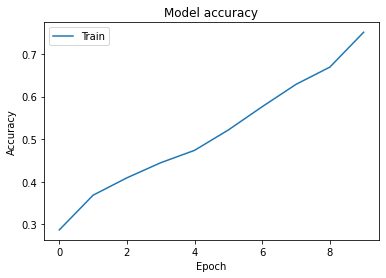

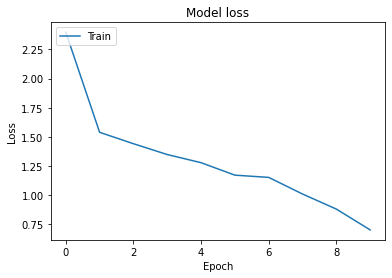

In [84]:
plt.plot(model2.history['accuracy'])
#plt.plot(model2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(model2.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [57]:
#model = keras.models.load_model('my_model.h5')
type(x_test)

NoneType

In [58]:
names=[]
path='image_data/test'
for f in os.listdir(path) :
    if f.endswith('.jpg'):
        names.append(f[:-4])

'''
per=names.sort()

for i in len(names):
    x_test[i]=
names=names[per]
#x_test = x_test[names]
'''


'\nper=names.sort()\n\nfor i in len(names):\n    x_test[i]=\nnames=names[per]\n#x_test = x_test[names]\n'

In [85]:
pred = model.predict_classes(x_test)
sub = pd.DataFrame({'id': names, 'flower_class': pred})


#sub=sub.sort_values(by=['id'])

sub.to_csv('submit22.csv', index=False) 
sub
#cross_val_score(rf,train_X,train_Y,cv=10).mean()

,id,flower_class
0,e86789078f3731bdc3d1e740825f29b3,1
1,6b0e58f46b51157485d532c8eeec6179,3
2,fd9cac41cda00325613b362025eb9cc1,1
3,10ede359e864dab7c381d9f8bb35de15,1
4,e73078a312effc5db81b849b083d1365,3
...,...,...
1995,5ba0a1dd4895ff62cd322dccbeab4d33,1
1996,39706bf6a1eb9fc681952d73cfdaa978,2
1997,09700570b778d58ab42a1aa8b62f4f83,4
1998,4cf03c70d04f9bcbf9918b896d21514f,1


In [ ]:
def conv_output(model, layer_name, img):
    """Get the output of conv layer.

    Args:
           model: keras model.
           layer_name: name of layer in the model.
           img: processed input image.

    Returns:
           intermediate_output: feature map.
    """
    # this is the placeholder for the input images
    input_img = model.input

    try:
        # this is the placeholder for the conv output
        out_conv = model.get_layer(layer_name).output
    except:
        raise Exception('Not layer named {}!'.format(layer_name))

    # get the intermediate layer model
    intermediate_layer_model = Model(inputs=input_img, outputs=out_conv)

    # get the output of intermediate layer model
    intermediate_output = intermediate_layer_model.predict(img)

    return intermediate_output[0]

In [ ]:
conv_output(model, layer_name, img)